<a href="https://colab.research.google.com/github/restrepo/inspire/blob/master/unetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Publications LHC collaborations
Only published articles considered.

In simplified version:
* Only first author of each collaboration is kept
* Only citation for articles with less than 10 authors considered

In [2]:
%pylab inline
import pandas as pd
import re
#pd.set_option('display.max_colwidth',200)
#pd.set_option('display.max_rows', 500)

Populating the interactive namespace from numpy and matplotlib


In [3]:
pd.set_option('display.max_colwidth',200)

In [4]:
from collections import Counter
def flatten(A):
    '''
    Flatten a list of strings and lists of strings and lists
    '''
    rt = []
    for i in A:
        if isinstance(i,list): rt.extend(flatten(i))
        else: rt.append(i)
    return rt

def listflatten2(l,key='affiliation'
                  ,internalkey='authors'):
    '''
    For a list of dictionaries get each
    dictionary item associted to `key`
    '''
    #TODO: Change to use previous flatten
    try:
        ll=[ [dd.get(key) 
             for dd in d.get(internalkey)] 
              for d in l]
        l= [item for sublist in ll for item in sublist]
        le=[]
        for j in l:
            if isinstance(j,str):
                le.append(j)
            elif isinstance(j,list):
                for k in j:
                    le.append(k)
    except:
        le=[]
    return le

def get_item_from_dictionary_key_inside_dictionary_key_inside_list(
     l,key,key_inside):
    if isinstance(l,list):
        ll=[ d.get(key).get(key_inside)   
            for d in l 
                if isinstance(d,dict)
                   and d.get(key)
                   and isinstance(d.get(key),dict)
                   and d.get(key).get(key_inside)
            ]
    else:
        ll=None
    return ll

def filter_long_authors(l):
    ll=[]
    if isinstance(l,list):
        if len(l)>10:
            ll=[l[0]]
        else:
            ll=l
    else:
        ll=l
    return ll

def publication_info_to_dict(x):
    if isinstance(x,list):
        d=x[0]
    elif isinstance(x,dict):
        d=x
    else:
        d=None
    return d
def add_journal_columns(dfp,journal={}):
    dfp['Year']=dfp['publication_info'].apply(
        lambda x: publication_info_to_dict(x)
    ).apply(
        lambda d: d.get('year') if isinstance(d,dict) else None).apply(
        lambda y: int(y) if isinstance(y,str) else 0)

    if journal:
        dfp['Journal_name']=dfp['publication_info'].apply(lambda d: journal.get( 
                                                d.get('title') ).get('container_title') 
                                                if isinstance(d,dict) 
                                                else None)
        dfp['ISSN']=dfp['publication_info'].apply(lambda d: journal.get( 
                                                d.get('title') ).get('ISSN') 
                                                if isinstance(d,dict) 
                                                else None)
    return dfp

In [5]:
#dffile='gfif.json.gz'
#dffile=''data/lhc_citations.json.gz'#
#dffile='data/lhc_citations_simple.json.gz'
dffile='https://github.com/restrepo/inspire/raw/master/data/lhc_citations_simple.json.gz'
df=pd.read_json(dffile,compression='gzip').reset_index(drop=True)
#df=pd.read_json('tmp_cites.json',orient='records',lines=True)

In [6]:
df.shape

(3591, 47)

## Drop long_author information

In [8]:
SIMPLIFY=False
institutes=['Antioquia U.','Colombia, U. Natl.','Andes U., Bogota','Antonio Narino U.']
if SIMPLIFY:
    authors=df['authors'].apply(lambda l: 
                     [d.get('affiliation') for d in l if d.get('affiliation') ]
                    if isinstance(l,list) else None 
                   ).apply(flatten
                   ).apply(lambda x: list(pd.np.unique(x))
                   )
else:    
    authors=df['authors']

In [9]:
if 'selected_affiliations' not in df:
    df['selected_affiliations']=authors.apply(lambda l: list( pd.np.intersect1d(l,institutes) )  )
del authors #Free memory

In [10]:
df[df['selected_affiliations'].astype(str).str.contains('Antioquia U.')].shape

(63, 47)

In [11]:
df['cites']=df['cites'].apply(lambda l: [d for d in l
                            if isinstance( d.get('authors'),list ) 
                              and len(d.get('authors'))<10
                            ] if isinstance(l,list) else None)

In [12]:
df['authors']=df['authors'].apply(filter_long_authors)

In [13]:
df['authors'].loc[100]

[{'INSPIRE_number': 'INSPIRE-00210391',
  'affiliation': 'Marseille, CPPM',
  'first_name': 'Georges',
  'full_name': 'Aad, Georges',
  'last_name': 'Aad'}]

In [14]:
df.shape

(3591, 47)

In [15]:
REWRITE=False
if REWRITE:
    df.to_json('lhc_citations_simple.json.gz',compression='gzip')

In [16]:
if 'Year' not in df:
    df=add_journal_columns(df)

In [17]:
sort( df['cites'].apply( lambda l: [d.get('Year') for d in l] if isinstance(l,list) else [0]  ).apply(
               pd.Series).stack()[:50]
    )

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
sort( df['cites'].apply( lambda l: [d.get('Year') for d in l] if isinstance(l,list) else [0]  ).apply(
               pd.Series).stack()[:50]
    )

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
def normalize_Year(l):
    '''
    Rebuild list to avoid update
    '''
    if isinstance(l,list):
        ll=[]
        for d in l:
            dd={'year':None}
            if not d.get('Year'):
                if isinstance(d.get('publication_info'),list):
                    dd=d.get('publication_info')[0]
                elif isinstance(d.get('publication_info'),dict):
                    dd=d.get('publication_info').copy()
                #else:
                #    dd={'year':None}
                if dd.get('year'):
                    d['Year']=int( dd.get('year') )
            else:
                d['Year']=int(d['Year'])
            ll.append(d)
        return ll   
    else:
        return None

In [20]:
#Normalize Year inside cigtes
df['cites']=df['cites'].apply(normalize_Year)

In [21]:
sort( df['cites'].apply( lambda l: [d.get('Year') for d in l] if isinstance(l,list) else [0]  ).apply(
               pd.Series).stack()[:50]
    )

array([   0.,    0., 2010., 2014., 2014., 2014., 2015., 2015., 2015.,
       2015., 2015., 2015., 2016., 2016., 2016., 2016., 2016., 2016.,
       2016., 2016., 2016., 2016., 2016., 2016., 2016., 2016., 2016.,
       2017., 2017., 2017., 2017., 2017., 2017., 2017., 2017., 2017.,
       2018., 2018., 2018., 2018., 2018., 2018., 2018., 2018., 2018.,
       2018., 2018., 2019., 2019., 2019.])

In [22]:
not_year_recids=df['cites'].apply(lambda l: 
                  [d.get('recid') for d in l if not d.get('Year')]
                  if isinstance(l,list) 
                  else None).dropna().apply(
               pd.Series).stack().unique().astype(int)#.shape

In [23]:
not_year_recids.shape

(9517,)

In [24]:
def normalize(df,nd={'title':'title_TeX',
                     'doi':'DOI'}):
    for k in nd.keys():
        if k in df:
            df[nd[k]]=df[k].apply(
                    lambda d: d[0] if isinstance(d,list) else d
                )
            #special cases
            if k=='title':
                df[nd[k]]=df[nd[k]].apply(
                    lambda d: d.get(k) if isinstance(d,dict) else d)
    return df
def get_query(q,sleep=1):
    cc=pd.DataFrame()
    jrec=cc.shape[0]
    while jrec%250==0:
        query='http://inspirehep.net/search?ln=en&p={}&rg=250&jrec={}&of=recjson'.format(
              q,jrec+1)
        try:
            c=pd.read_json(query)
        except:# HTTPError:
            print('WARNING → May be HTTPError: HTTP Error 404: Not Found')
            c=pd.DataFrame()
        c=normalize(c)
        if not c.empty:
            cc=(cc.append(c,sort=True)).reset_index(drop=True)
            jrec=cc.shape[0]
        else:
            jrec=jrec+1 # To exit the loop
        print('jrec',jrec)
        time.sleep(sleep)
    return cc

In [485]:
get_query('recid:208703')

WARNING → May be HTTPError: HTTP Error 404: Not Found
jrec 1


""


In [25]:
not_year_recids

array([1706820, 1503940, 1423362, ..., 1722504, 1422893, 1241446])

In [26]:
REBUILD=False
if REBUILD:
    mr=pd.DataFrame()
    for r in not_year_recids:
        kk=get_query('recid:{}'.format(r),sleep=2)
        if not kk.empty:
            mr=mr.append(kk.loc[[0]],sort=True).reset_index(drop=True)
        #http://inspirehep.net/search?p=recid:208703&of=recjson

In [27]:
WRITE=False
if WRITE:
    mr.to_json('recids_year.json.gz',compression='gzip')
else:
    mr=pd.read_json('recids_year.json.gz',compression='gzip')

In [28]:
if 'Year' not in mr:
    mr=add_journal_columns(mr) #add mr['Year']

## Prepare citations bins

In [29]:
def fix_year(row):
    x=row['Year']
    if row['Year']==0:
        x=0
        if x==0 and row.get('imprint'):
            try:
                x=row.get('imprint').get('date').split('-')[0]
            except:
                x=0
        if x==0 and row.get('primary_report_number'):
            xx=''
            if isinstance(row.get('primary_report_number'),str):
                xx=row.get('primary_report_number')
            elif isinstance(row.get('primary_report_number'),list):
                for i in row.get('primary_report_number'):
                    if i and re.search('^arXiv\:',i):
                        xx=i
            if xx:
                try:
                    x=int( '20{}'.format( 
                            xx.split(':')[-1][:2] ) )
                except:
                    x=0
        #ALWAYS PRESENT!
        cd=row.get('creation_date')
        if x==0 and cd:
            if isinstance(cd,str):
                try:
                    x=int( cd.split('-')[0] )
                except:
                    x=0
        
    return x

In [30]:
mr[12:13].primary_report_number

1008    arXiv:1911.12394
Name: primary_report_number, dtype: object

In [31]:
mr['Year']=mr.apply(fix_year,axis=1)

In [32]:
df['Year']=df.apply(fix_year,axis=1)

Fix Year inside citations

In [33]:
mr[mr['recid']==1706820]['Year'].reset_index(drop=True).loc[0]

2018

In [34]:
def get_recid_year(d,missing_recids):
    if d.get('recid') and not d.get('Year'):
        try:
            y=missing_recids[
                missing_recids['recid']==d.get('recid')
                ]['Year'].reset_index(drop=True).loc[0]
        except KeyError:
            y=None
        if y:    
            d.update({'Year':y})

In [35]:
#dictionaries are updated
kk=df['cites'].apply(lambda l: [ get_recid_year(d,mr) for d in l if isinstance(d,dict)   ]
                 if isinstance(l,list) else None)

In [36]:
df['cites'].apply( lambda l:[ d.get('Year') for d in l]  if isinstance(l,list) else None)

0                                                                                                                                                                                                          None
1                                                                                                                                                                                                          None
2                                                                                            [2019, 2018, 2018, 2017, 2018, 2017, 2016, 2017, 2016, 2016, 2017, 2015, 2015, 2016, 2015, 2016, 2015, 2016, 2015]
3        [2019, 2016, 2018, 2018, 2017, 2017, 2017, 2017, 2018, 2018, 2017, 2016, 2017, 2017, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2015, 2016, 2016, 2014, 2015, 2014, 2014, 2014]
4       [2018, 2015, 2018, 2019, 2019, 2019, 2018, 2018, 2018, 2018, 2010, 2018, 2014, 2017, 2011, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2015, 201

In [38]:
df[:4].to_json('kk.json')

AttributeError: 'NoneType' object has no attribute 'apply'

In [40]:
kk=pd.read_json('kk.json')
kk['cites'].apply( lambda l:[ d.get('Year') for d in l]  if isinstance(l,list) else None)

0                                                                                                                                                                                                      None
1                                                                                                                                                                                                      None
2                                                                                        [2019, 2018, 2018, 2017, 2018, 2017, 2016, 2017, 2016, 2016, 2017, 2015, 2015, 2016, 2015, 2016, 2015, 2016, 2015]
3    [2019, 2016, 2018, 2018, 2017, 2017, 2017, 2017, 2018, 2018, 2017, 2016, 2017, 2017, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2015, 2016, 2016, 2014, 2015, 2014, 2014, 2014]
Name: cites, dtype: object

In [41]:
REWRITE=True
if REWRITE:
    df.to_json('lhc_citations_simple.json.gz',compression='gzip')

TODO: apply fix_year to each one of the citations:
* get recid and apply fix_year to recid JSON

In [42]:
df=pd.read_json('lhc_citations_simple.json.gz',compression='gzip')

In [350]:
df['cites_year']=df['cites'].apply(lambda l: [   str(d.get('Year'))
                                for d in l 
                                  if isinstance(d,dict) and d.get('Year')   
                            ]
                            if isinstance(l,list) else None).apply(
                   lambda l:  dict(Counter(l))
                            if isinstance(l,list) else None)

In [351]:
df.loc[[4]].cites_year

4    {'2010': 4, '2014': 4, '2011': 6, '2006': 1, '2015': 4, '2008': 3, '2016': 10, '2019': 3, '2009': 3, '2017': 1, '2018': 7, '2013': 5, '2007': 5, '2012': 10}
Name: cites_year, dtype: object

In [352]:
df['cites_first_year']=df.apply(lambda row: row.get('cites_year').get( str(row.get('Year')) )  
                                  if isinstance(row.get('cites_year'),dict)
                                     and row.get('Year')
                                  else 0,axis=1).fillna(0).astype(int)

## Checks

## Analysis

In [353]:
def bin_citations(df,years=range(2009,2021),cn=None,affiliation=None):
    '''
    years: list of Years
    cn: None,'ALICE','ATLAS',CMS','LHCb'
    affiliation: currently → ['Antioquia U.','Colombia, U. Natl.','Andes U., Bogota','Antonio Narino U.']
    
    '''
    qq=df.copy()
    if cn:
        qq=qq[qq['accelerator_experiment'].astype(
            str).str.contains('CERN-LHC-{}'.format(cn))
             ].reset_index(drop=True)
    if affiliation:
        qq=qq[qq['selected_affiliations'].astype(
            str).str.contains('{}'.format(affiliation))].reset_index(drop=True)

    for y in years:
        kk=qq[qq['Year']==y].reset_index(drop=True)
        print( 'Year: {}, Number: {:03d}, Cites first Year: {:04d}, ratio: {:.1f}, TOTAL cites: {}'.format(
            y,
            kk.shape[0],kk['cites_first_year'].sum(),
            kk['cites_first_year'].sum()/kk.shape[0],
            kk['cites'].apply(lambda l:l if isinstance(l,list) else []).apply(len).sum()
        ))         

In [354]:
bin_citations(df)

Year: 2009, Number: 045, Cites first Year: 0034, ratio: 0.8, TOTAL cites: 251
Year: 2010, Number: 078, Cites first Year: 0420, ratio: 5.4, TOTAL cites: 8457
Year: 2011, Number: 197, Cites first Year: 2190, ratio: 11.1, TOTAL cites: 15795
Year: 2012, Number: 318, Cites first Year: 5631, ratio: 17.7, TOTAL cites: 46947
Year: 2013, Number: 403, Cites first Year: 4227, ratio: 10.5, TOTAL cites: 29001
Year: 2014, Number: 299, Cites first Year: 2713, ratio: 9.1, TOTAL cites: 24708
Year: 2015, Number: 285, Cites first Year: 3541, ratio: 12.4, TOTAL cites: 23656
Year: 2016, Number: 324, Cites first Year: 3628, ratio: 11.2, TOTAL cites: 15990
Year: 2017, Number: 313, Cites first Year: 2556, ratio: 8.2, TOTAL cites: 12686
Year: 2018, Number: 348, Cites first Year: 3138, ratio: 9.0, TOTAL cites: 10251
Year: 2019, Number: 327, Cites first Year: 2777, ratio: 8.5, TOTAL cites: 3583
Year: 2020, Number: 037, Cites first Year: 0070, ratio: 1.9, TOTAL cites: 202


In [355]:
bin_citations(df,cn='CMS')

Year: 2009, Number: 017, Cites first Year: 0019, ratio: 1.1, TOTAL cites: 170
Year: 2010, Number: 038, Cites first Year: 0168, ratio: 4.4, TOTAL cites: 2986
Year: 2011, Number: 084, Cites first Year: 1013, ratio: 12.1, TOTAL cites: 7183
Year: 2012, Number: 093, Cites first Year: 1882, ratio: 20.2, TOTAL cites: 18920
Year: 2013, Number: 126, Cites first Year: 1311, ratio: 10.4, TOTAL cites: 8862
Year: 2014, Number: 083, Cites first Year: 1160, ratio: 14.0, TOTAL cites: 8468
Year: 2015, Number: 086, Cites first Year: 1479, ratio: 17.2, TOTAL cites: 8619
Year: 2016, Number: 103, Cites first Year: 1244, ratio: 12.1, TOTAL cites: 5091
Year: 2017, Number: 124, Cites first Year: 1088, ratio: 8.8, TOTAL cites: 4412
Year: 2018, Number: 148, Cites first Year: 1298, ratio: 8.8, TOTAL cites: 4224
Year: 2019, Number: 132, Cites first Year: 1112, ratio: 8.4, TOTAL cites: 1421
Year: 2020, Number: 013, Cites first Year: 0015, ratio: 1.2, TOTAL cites: 72


In [356]:
bin_citations(df,cn='ATLAS')

Year: 2009, Number: 008, Cites first Year: 0006, ratio: 0.8, TOTAL cites: 44
Year: 2010, Number: 015, Cites first Year: 0087, ratio: 5.8, TOTAL cites: 2653
Year: 2011, Number: 063, Cites first Year: 0773, ratio: 12.3, TOTAL cites: 5183
Year: 2012, Number: 131, Cites first Year: 2798, ratio: 21.4, TOTAL cites: 21141
Year: 2013, Number: 098, Cites first Year: 1314, ratio: 13.4, TOTAL cites: 8454
Year: 2014, Number: 085, Cites first Year: 0741, ratio: 8.7, TOTAL cites: 8662
Year: 2015, Number: 110, Cites first Year: 1648, ratio: 15.0, TOTAL cites: 10485
Year: 2016, Number: 130, Cites first Year: 1681, ratio: 12.9, TOTAL cites: 7742
Year: 2017, Number: 091, Cites first Year: 0681, ratio: 7.5, TOTAL cites: 3867
Year: 2018, Number: 114, Cites first Year: 1339, ratio: 11.7, TOTAL cites: 4270
Year: 2019, Number: 101, Cites first Year: 0923, ratio: 9.1, TOTAL cites: 1170
Year: 2020, Number: 015, Cites first Year: 0031, ratio: 2.1, TOTAL cites: 85


In [357]:
bin_citations(df,affiliation='Antioquia U.')

Year: 2009, Number: 000, Cites first Year: 0000, ratio: nan, TOTAL cites: 0
Year: 2010, Number: 000, Cites first Year: 0000, ratio: nan, TOTAL cites: 0
Year: 2011, Number: 000, Cites first Year: 0000, ratio: nan, TOTAL cites: 0
Year: 2012, Number: 000, Cites first Year: 0000, ratio: nan, TOTAL cites: 0
Year: 2013, Number: 000, Cites first Year: 0000, ratio: nan, TOTAL cites: 0
Year: 2014, Number: 008, Cites first Year: 0277, ratio: 34.6, TOTAL cites: 1247
Year: 2015, Number: 000, Cites first Year: 0000, ratio: nan, TOTAL cites: 0
Year: 2016, Number: 000, Cites first Year: 0000, ratio: nan, TOTAL cites: 0
Year: 2017, Number: 016, Cites first Year: 0119, ratio: 7.4, TOTAL cites: 681
Year: 2018, Number: 002, Cites first Year: 0012, ratio: 6.0, TOTAL cites: 28
Year: 2019, Number: 028, Cites first Year: 0173, ratio: 6.2, TOTAL cites: 222
Year: 2020, Number: 009, Cites first Year: 0012, ratio: 1.3, TOTAL cites: 45


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in long_scalars


In [358]:
bin_citations(df,affiliation='Colombia, U. Natl.')

Year: 2009, Number: 000, Cites first Year: 0000, ratio: nan, TOTAL cites: 0
Year: 2010, Number: 000, Cites first Year: 0000, ratio: nan, TOTAL cites: 0
Year: 2011, Number: 000, Cites first Year: 0000, ratio: nan, TOTAL cites: 0
Year: 2012, Number: 000, Cites first Year: 0000, ratio: nan, TOTAL cites: 0
Year: 2013, Number: 000, Cites first Year: 0000, ratio: nan, TOTAL cites: 0
Year: 2014, Number: 001, Cites first Year: 0001, ratio: 1.0, TOTAL cites: 18
Year: 2015, Number: 053, Cites first Year: 0458, ratio: 8.6, TOTAL cites: 4112
Year: 2016, Number: 048, Cites first Year: 0369, ratio: 7.7, TOTAL cites: 1991
Year: 2017, Number: 050, Cites first Year: 0478, ratio: 9.6, TOTAL cites: 2114
Year: 2018, Number: 019, Cites first Year: 0154, ratio: 8.1, TOTAL cites: 597
Year: 2019, Number: 042, Cites first Year: 0451, ratio: 10.7, TOTAL cites: 585
Year: 2020, Number: 005, Cites first Year: 0014, ratio: 2.8, TOTAL cites: 24


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in long_scalars


In [359]:
df['number_of_citations'].sum()

285326

TODO: Problem with year inside citations

In [360]:
udea=df[df['selected_affiliations'].astype(
            str).str.contains('{}'.format('Antioquia U.'))].reset_index(drop=True)

In [361]:
qq=udea[udea['Year']==2019].reset_index(drop=True)

In [362]:
def sum_cites(d):
    if isinstance(d,dict):
        c=0
        if d.get('2019'):
            c=c+d.get('2019')
        if d.get('2020'):
            c=c+d.get('2020')
    else:
        c=0
    return c

In [363]:
qq['cc1']=qq['cites_year'].apply(sum_cites)

In [364]:
qq['cc2']=qq['cites'].apply(lambda l:l if isinstance(l,list) else []).apply(len)

In [365]:
qq[['title','cc1','cc2','number_of_citations']][:4]

,title,cc1,cc2,number_of_citations
0,{'title': 'Search for invisible decays of a Higgs boson produced through vector boson fusion in proton-proton collisions at $\sqrt{s} =$ 13 TeV'},80,80,87
1,{'title': 'Measurement of the average very forward energy as a function of the track multiplicity at central pseudorapidities in proton-proton collisions at $\sqrt{s}=$ 13 TeV'},1,1,1
2,{'title': 'Measurement of the top quark Yukawa coupling from $\mathrm{t\bar{t}}$ kinematic distributions in the lepton+jets final state in proton-proton collisions at $\sqrt{s} =$ 13 TeV'},3,3,2
3,{'title': 'Search for physics beyond the standard model in events with overlapping photons and jets'},0,0,0


In [366]:
qq.loc[[2]]['cites'].str[0]

2    {'Year': '2019', 'DOI': None, 'publication_info': {'year': '2019'}, 'recid': 1780772, 'authors': [{'affiliation': 'Glasgow U.', 'last_name': 'Fenton', 'INSPIRE_number': 'INSPIRE-00546149', 'full_n...
Name: cites, dtype: object

'publication_info': None

In [367]:
qq.loc[[2]]['cites'].str[2]

2    {'DOI': None, 'publication_info': None, 'authors': [{'affiliation': 'Humboldt U., Berlin', 'last_name': 'Kraus', 'full_name': 'Kraus, Manfred', 'first_name': 'Manfred'}, {'affiliation': 'Humboldt ...
Name: cites, dtype: object

### Citations first year

In [0]:
qq=df.copy()
qq=dfcms.copy()
years=range(2009,2021)
for y in years:
    kk=qq[qq['Year']==y].reset_index(drop=True)
    print( 'Year: {}, Number: {}, Cites first Year: {}, ratio: {:.1f}, TOTAL cites: {}'.format(
            y,kk.shape[0],kk['cites_first_year'].sum(),
          kk['cites_first_year'].sum()/kk.shape[0],kk['number_of_citations'].sum()    )) 

Year: 2009, Number: 17, Cites first Year: 11, ratio: 0.6, TOTAL cites: 226
Year: 2010, Number: 38, Cites first Year: 64, ratio: 1.7, TOTAL cites: 3819
Year: 2011, Number: 84, Cites first Year: 461, ratio: 5.5, TOTAL cites: 10719
Year: 2012, Number: 93, Cites first Year: 1291, ratio: 13.9, TOTAL cites: 22906
Year: 2013, Number: 126, Cites first Year: 1062, ratio: 8.4, TOTAL cites: 12247
Year: 2014, Number: 83, Cites first Year: 843, ratio: 10.2, TOTAL cites: 11144
Year: 2015, Number: 86, Cites first Year: 1152, ratio: 13.4, TOTAL cites: 11861
Year: 2016, Number: 103, Cites first Year: 1048, ratio: 10.2, TOTAL cites: 7670
Year: 2017, Number: 124, Cites first Year: 907, ratio: 7.3, TOTAL cites: 7461
Year: 2018, Number: 148, Cites first Year: 1111, ratio: 7.5, TOTAL cites: 6234
Year: 2019, Number: 132, Cites first Year: 821, ratio: 6.2, TOTAL cites: 1865
Year: 2020, Number: 13, Cites first Year: 5, ratio: 0.4, TOTAL cites: 117


In [0]:
qq=df[df['selected_affiliations'].astype(str).str.contains('Antioquia U.')].reset_index(drop=True)
#qq=dfcms.copy()
years=range(2009,2021)
for y in years:
    kk=qq[qq['Year']==y].reset_index(drop=True)
    print( 'Year: {}, Number: {}, Cites first Year: {}, ratio: {}'.format(
            y,kk.shape[0],kk['cites_first_year'].sum(),
          kk['cites_first_year'].sum()/kk.shape[0]    )) 

Year: 2009, Number: 0, Cites first Year: 0, ratio: nan
Year: 2010, Number: 0, Cites first Year: 0, ratio: nan
Year: 2011, Number: 0, Cites first Year: 0, ratio: nan
Year: 2012, Number: 0, Cites first Year: 0, ratio: nan
Year: 2013, Number: 0, Cites first Year: 0, ratio: nan
Year: 2014, Number: 8, Cites first Year: 220, ratio: 27.5
Year: 2015, Number: 0, Cites first Year: 0, ratio: nan
Year: 2016, Number: 0, Cites first Year: 0, ratio: nan
Year: 2017, Number: 16, Cites first Year: 89, ratio: 5.5625
Year: 2018, Number: 2, Cites first Year: 8, ratio: 4.0
Year: 2019, Number: 28, Cites first Year: 112, ratio: 4.0
Year: 2020, Number: 9, Cites first Year: 3, ratio: 0.3333333333333333


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


In [0]:
qq=df[df['selected_affiliations'].astype(str).str.contains('Colombia, U. Natl.')].reset_index(drop=True)
#qq=dfcms.copy()
years=range(2009,2021)
for y in years:
    kk=qq[qq['Year']==y].reset_index(drop=True)
    print( 'Year: {}, Number: {}, Cites first Year: {}, ratio: {}'.format(
            y,kk.shape[0],kk['cites_first_year'].sum(),
          kk['cites_first_year'].sum()/kk.shape[0]    )) 

Year: 2009, Number: 0, Cites first Year: 0, ratio: nan
Year: 2010, Number: 0, Cites first Year: 0, ratio: nan
Year: 2011, Number: 0, Cites first Year: 0, ratio: nan
Year: 2012, Number: 0, Cites first Year: 0, ratio: nan
Year: 2013, Number: 0, Cites first Year: 0, ratio: nan
Year: 2014, Number: 1, Cites first Year: 0, ratio: 0.0
Year: 2015, Number: 53, Cites first Year: 329, ratio: 6.2075471698113205
Year: 2016, Number: 48, Cites first Year: 312, ratio: 6.5
Year: 2017, Number: 50, Cites first Year: 391, ratio: 7.82
Year: 2018, Number: 19, Cites first Year: 138, ratio: 7.2631578947368425
Year: 2019, Number: 42, Cites first Year: 300, ratio: 7.142857142857143
Year: 2020, Number: 5, Cites first Year: 6, ratio: 1.2


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


TOTAL

In [0]:
df

array([1658520,  922303,  885912, ...,  886091,  871952,  858857])

In [0]:
df['number_of_citations'].sum()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [0]:
df['cites'].apply(lambda l: [d.get('recid') for d in l] if isinstance(l,list) else []  ).apply(len).sum()

286300

In [0]:
recids=df['cites'].apply(lambda l: [d.get('recid') for d in l] if isinstance(l,list) else []  ).apply(
    pd.Series).stack().unique().astype(int)

In [0]:
recids.shape

(52762,)

NOT LHC

In [0]:
df['cites'].apply(lambda l: [d.get('recid') for d in l
                            if isinstance( d.get('authors'),list ) 
                              and len(d.get('authors'))<10
                            ] if isinstance(l,list) else []  ).apply(len).sum()

212890

In [0]:
recids_not_lhc=df['cites'].apply(lambda l: [d.get('recid') for d in l
                            if isinstance( d.get('authors'),list ) 
                              and len(d.get('authors'))<10
                            ] if isinstance(l,list) else []  ).apply(
                            pd.Series).stack().unique().astype(int)

In [0]:
recids_not_lhc.shape

(44892,)

In [0]:
1658520 in recids_not_lhc

True

## DataFrame without LHC citations

In [0]:
df_not_lhc=df.copy()

In [0]:
df_not_lhc['cites']=df['cites'].apply(lambda l: [d for d in l
                            if isinstance( d.get('authors'),list ) 
                              and len(d.get('authors'))<10
                            ] if isinstance(l,list) else None)

check:
    

In [0]:
df_not_lhc['cites'].apply(lambda l: [d.get('recid') for d in l] 
                          if isinstance(l,list) else []  ).apply(
                            pd.Series).stack().unique().astype(int).shape

(44892,)

## Analysis
### Institutions

In [0]:
institutes=df_not_lhc.cites.apply(lambda l: [ #Filer citations with many authors
                 d for d in l if isinstance( d.get('authors'),list ) 
                              and len(d.get('authors'))<10
                         ]  if isinstance(l,list) else None 
        ).apply(listflatten2 #Obtain affiliations
        ).apply( lambda l: #select unique affiliations
            np.unique(l) if isinstance(l,list) else [] 
        ).apply(pd.Series).stack().unique()

In [0]:
institutes.shape

(3453,)

In [0]:
import re
[ i for i  in institutes if re.search('Antioquia',i)]

['Antioquia U.', 'Escuela de Ingenieria de Antioquia']

In [0]:
aumax=10
df['cites_insitutions']=df.cites.apply(lambda l: [ #Filer citations with many authors
                 d for d in l if isinstance( d.get('authors'),list ) 
                              and len(d.get('authors'))<10
                         ]  if isinstance(l,list) else None 
        ).apply(listflatten2 #Obtain affiliations
        ).apply( lambda l: #select unique affiliations
            np.unique(l) if isinstance(l,list) else [] 
        )#.apply(len)

In [0]:
nc=df[df.authors.apply(len)<10].reset_index(drop=True)

In [0]:
df['number_of_cites_institutions']=df['cites_insitutions'].apply(len)

In [0]:
df.keys()

Index(['DOI', 'FIXME_OAI', 'abbreviated_title', 'abstract',
       'accelerator_experiment', 'agency_code', 'authors', 'base',
       'cataloguer_info', 'cites', 'collection', 'comment', 'corporate_name',
       'coyright', 'creation_date', 'doi', 'filenames', 'files', 'filetypes',
       'imprint', 'keywords', 'license', 'nc', 'number_of_authors',
       'number_of_citations', 'number_of_comments', 'number_of_reviews', 'oai',
       'other_report_number', 'persistent_identifiers_keys',
       'physical_description', 'prepublication', 'primary_report_number',
       'publication_info', 'recid', 'reference', 'source_of_acquisition',
       'subject', 'system_control_number', 'system_number', 'thesaurus_terms',
       'title', 'title_TeX', 'title_additional', 'url', 'version_id',
       'cites_insitutions', 'number_of_cites_institutions'],
      dtype='object')

In [0]:
df[['title','number_of_citations','number_of_cites_institutions','Year']].sort_values(
        'Year',ascending=False#'number_of_cites_insitutions',ascending=False#'number_of_citations',ascending=False
        ).reset_index(drop=True)

,title,number_of_citations,number_of_cites_institutions,Year
0,{'title': 'Combined search for supersymmetry with photons in proton-proton collisions at $\sqrt{s}=$ 13 TeV'},1,1,2020
1,{'title': 'Search for displaced vertices of oppositely charged leptons from decays of long-lived particles in $pp$ collisions at $\sqrt {s}$ =13 TeV with the ATLAS detector'},6,25,2020
2,{'title': 'Search for a charged Higgs boson decaying into top and bottom quarks in events with electrons or muons in proton-proton collisions at $ \sqrt{\mathrm{s}} $ = 13 TeV'},6,13,2020
3,{'title': 'Observation of several sources of $CP$ violation in $B^+ \to \pi^+ \pi^+ \pi^-$ decays'},6,4,2020
4,{'title': 'Updated measurement of decay-time-dependent CP asymmetries in $D^0 \to K^+K^-$ and $D^0 \to \pi^+\pi^-$ decays'},2,5,2020
5,{'title': 'Search for non-resonant Higgs boson pair production in the $bb\ell\nu\ell\nu$ final state with the ATLAS detector in $pp$ collisions at $\sqrt{s} = 13$ TeV'},5,12,2020
6,{'title': 'Search for production of four top quarks in final states with same-sign or multiple leptons in proton-proton collisions at $\sqrt{s}=$ 13 TeV'},12,17,2020
7,{'title': 'Search for the doubly charmed baryon $\Xi_{cc}^+$'},10,13,2020
8,{'title': 'Measurement of strange baryon–antibaryon interactions with femtoscopic correlations'},2,2,2020
9,{'title': 'Evidence for WW production from double-parton interactions in proton-proton collisions at $\sqrt{s} =$ 13 TeV'},5,9,2020


In [0]:
l=df.sort_values(
        'number_of_citations',ascending=False#'number_of_cites_insitutions',ascending=False#'number_of_citations',ascending=False
        ).reset_index(drop=True)['cites_insitutions'].loc[0]

In [0]:
list(l)

['A-STAR, Singapore',
 'ABC Federal U.',
 'ADSM, Hiroshima',
 'AGH-UST, Cracow',
 'AIP, College Park',
 'APC, Paris',
 'APCTP, Pohang',
 'ARC, CoEPP, Australia',
 'Aachen, Tech. Hochsch.',
 'Aalto U.',
 'Aarhus U.',
 'Aarhus U., ISA',
 'Abant Izzet Baysal U.',
 'Abdelmalek Essaadi U.',
 'Academia Sinica, Taiwan',
 'Acadia U.',
 'Adelaide U.',
 'Adelaide U., Sch. Chem. Phys.',
 'Adger U. Coll., Kristiansand',
 'Adolfo Ibanez U.',
 'Aegean U.',
 'Ahmedabad, Phys. Res. Lab',
 'Aichi Medical U.',
 'Ain Shams U., Cairo',
 'Aix-Marseille U.',
 'Akita High School',
 'Al-Azhar U., Cairo',
 'Alabama U.',
 'Alan Turing Institute',
 'Alberta U.',
 'Alexandria U.',
 'Algiers U.',
 'Algiers, Ecole Normale Superieure',
 'Algoma U.',
 'Aligarh Muslim U.',
 'Ambedkar, Nat. Inst. Technol.',
 'American U. of Beirut',
 'American U., Sharjah',
 'Americas U., Puebla',
 'Amsterdam U.',
 'An Giang U.',
 'An Giang U., Vietnam',
 'Andes U., Bogota',
 'Andres Bello Natl. U.',
 'Anhui U.',
 'Anhui U. Sci. Tech.'

In [0]:
nc=df[df.authors.apply(len)<10].reset_index(drop=True)

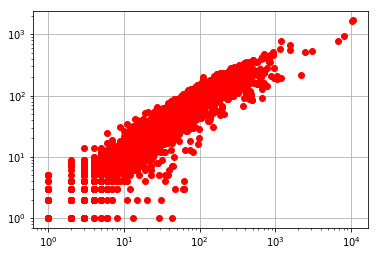

In [0]:
plt.loglog(df['number_of_citations'],df['number_of_cites_institutions'],'ro')
plt.grid()

(0, 35)

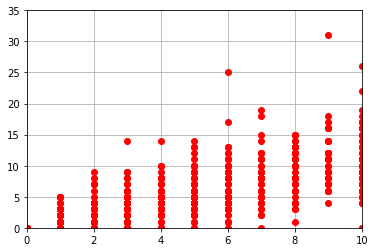

In [0]:
plt.plot(df['number_of_citations'],df['number_of_cites_institutions'],'ro')
plt.grid()
plt.xlim(0,10)
plt.ylim(0,35)

(10, 95)

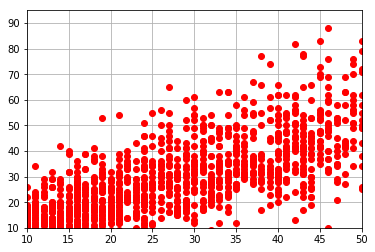

In [0]:
plt.plot(df['number_of_citations'],df['number_of_cites_institutions'],'ro')
plt.grid()
plt.xlim(10,50)
plt.ylim(10,95)

(50, 160)

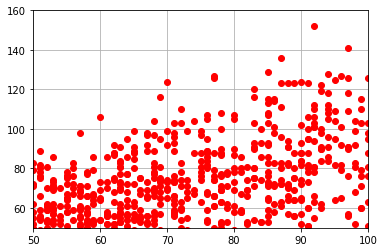

In [0]:
plt.plot(df['number_of_citations'],df['number_of_cites_institutions'],'ro')
plt.grid()
plt.xlim(50,100)
plt.ylim(50,160)

(100, 500)

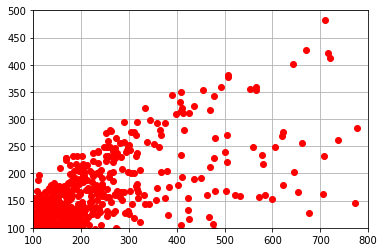

In [0]:
plt.plot(df['number_of_citations'],df['number_of_cites_institutions'],'ro')
plt.grid()
plt.xlim(100,800)
plt.ylim(100,500))['cites_insitutions']

In [0]:
df.sort_values(
        'number_of_citations',ascending=False)[['title','number_of_citations']]

,title,number_of_citations
2083,{'title': 'Observation of a new particle in the search for the Standard Model Higgs boson with the ATLAS detector at the LHC'},10515
2082,{'title': 'Observation of a New Boson at a Mass of 125 GeV with the CMS Experiment at the LHC'},10264
2081,{'title': 'The ATLAS Experiment at the CERN Large Hadron Collider'},7984
2080,{'title': 'The CMS Experiment at the CERN LHC'},6681
2078,{'title': 'The LHCb Detector at the LHC'},3036
2076,{'title': 'The ALICE experiment at the CERN LHC'},2446
2075,{'title': 'The ATLAS Simulation Infrastructure'},2193
2074,{'title': 'Combined Measurement of the Higgs Boson Mass in $pp$ Collisions at $\sqrt{s}=7$ and 8 TeV with the ATLAS and CMS Experiments'},1574
2073,"{'title': 'CMS technical design report, volume II: Physics performance'}",1562
2072,{'title': 'Multi-messenger Observations of a Binary Neutron Star Merger'},1205


In [0]:
df[np.logical_and( df['number_of_citations']>1000,df['number_of_cites_institutions']>0       )
  ][['title','number_of_citations','number_of_cites_institutions','Year']].sort_values(
        'number_of_cites_institutions',ascending=False)#'number_of_citations',ascending=False

,title,number_of_citations,number_of_cites_institutions,Year
3584,{'title': 'Observation of a new particle in the search for the Standard Model Higgs boson with the ATLAS detector at the LHC'},10515,1690,2012
3583,{'title': 'Observation of a New Boson at a Mass of 125 GeV with the CMS Experiment at the LHC'},10264,1663,2012
3582,{'title': 'The ATLAS Experiment at the CERN Large Hadron Collider'},7984,949,2008
3581,{'title': 'The CMS Experiment at the CERN LHC'},6681,782,2008
3575,{'title': 'Multi-messenger Observations of a Binary Neutron Star Merger'},1205,770,2017
3577,{'title': 'Combined Measurement of the Higgs Boson Mass in $pp$ Collisions at $\sqrt{s}=7$ and 8 TeV with the ATLAS and CMS Experiments'},1574,674,2015
3573,{'title': 'Measurements of the Higgs boson production and decay rates and constraints on its couplings from a combined ATLAS and CMS analysis of the LHC pp collision data at $ \sqrt{s}=7 $ and 8 T...,1162,583,2016
3576,"{'title': 'CMS technical design report, volume II: Physics performance'}",1562,566,2007
3580,{'title': 'The LHCb Detector at the LHC'},3036,539,2008
3579,{'title': 'The ALICE experiment at the CERN LHC'},2446,519,2008


In [0]:
df[np.logical_and( df['number_of_citations']>1000,df['number_of_cites_institutions']>0       )
  ][['title','number_of_citations','number_of_cites_institutions','Year']].sort_values(
        'number_of_cites_institutions',ascending=False).keys()

Index(['title', 'number_of_citations', 'number_of_cites_institutions', 'Year'], dtype='object')

In [0]:
kk=df[np.logical_and( df['number_of_citations']>300,df['number_of_cites_insititutions']>0        )
  ]
kk[['title','number_of_citations','number_of_cites_institutions','Year']].sort_values(
        'number_of_cites_institutions',ascending=False)#'number_of_citations',ascending=False

,title,number_of_citations,number_of_cites_institutions,Year
135,{'title': 'Leptogenesis'},742,416,2008
193,{'title': 'Measurement of Higgs Boson Production and Properties in the WW Decay Channel with Leptonic Final States'},412,321,2014
101,{'title': 'Search for the Standard Model Higgs Boson Produced in Association with a W or a Z Boson and Decaying to Bottom Quarks'},375,293,2014
147,{'title': 'The Importance of flavor in leptogenesis'},422,232,2006
191,{'title': 'Particle-flow reconstruction and global event description with the CMS detector'},677,125,2017


In [0]:
kk=df[np.logical_and( df['number_of_citations']>10,df['number_of_citations']<20       )
  ]
kk[['title','number_of_citations','number_of_cites_institutions','Year']].sort_values(
        'number_of_cites_institutions',ascending=False)#'number_of_citations',ascending=False

,title,number_of_citations,number_of_cites_institutions,Year
82,{'title': 'Radiative Type III Seesaw Model and its collider phenomenology'},15,38,2016
89,{'title': 'Diboson anomaly: Heavy Higgs resonance and QCD vectorlike exotics'},17,36,2016
107,{'title': 'Baryonic violation of $R$ parity from anomalous $U(1)_H$'},18,33,2013
48,"{'title': 'Probing a simplified, $W^{\prime}$ model of $R(D^{(\ast)})$ anomalies using $b$-tags, $\tau$ leptons and missing energy'}",16,32,2018
39,{'title': 'Observation of Single Top Quark Production in Association with a $Z$ Boson in Proton-Proton Collisions at $\sqrt {s}$ =13 TeV'},15,32,2019
88,{'title': 'The Inert Zee Model'},14,30,2016
141,{'title': 'Phenomenology of the SU(3)(c) x SU(3)(L) x U(1)(X) model with exotic charged leptons'},16,27,2007
23,{'title': 'Search for pair production of vectorlike quarks in the fully hadronic final state'},12,26,2019
61,{'title': 'Measurements of jet charge with dijet events in pp collisions at $\sqrt{s}=8$ TeV'},17,25,2017
134,{'title': 'Novel Higgs decay signals in R-parity violating models'},17,24,2008


In [0]:
kkk[['title','number_of_citations','nuaber_of_cites_insitutions','Year','cites']]

,title,number_of_citations,number_of_cites_insitutions,Year,cites
0,{'title': 'Dirac neutrino mass generation from Majorana messenger'},1,36,2020,"[{'authors': [{'last_name': 'Jana', 'affiliation': ['Heidelberg, Max Planck Inst.', 'Oklahoma State U.'], 'full_name': 'Jana, Sudip', 'first_name': 'Sudip'}, {'last_name': 'Vishnu', 'affiliation':..."


In [0]:
kkk.cites.apply(lambda l: [ #Filer citations with many authors
                 d for d in l if isinstance( d.get('authors'),list ) 
                              and len(d.get('authors'))<10
                         ]  if isinstance(l,list) else None 
        ).apply(listflatten2 #Obtain affiliations
        ).apply( lambda l: #select unique affiliations
            np.unique(l) if isinstance(l,list) else [] 
        ).apply(len)

0    2
Name: cites, dtype: int64

In [0]:
df.number_of_citations.sum()

7910

In [0]:
nc.cites.apply(lambda l: listflatten2(l) if isinstance(l,list) else []).apply(len)#.loc[2]#.apply(
    #lambda l: np.unique(l).shape[0])

0         0
1         0
2        33
3         0
4         0
5         0
6         0
7         0
8         0
9        92
10        0
11        0
12     1264
13        0
14        0
15     2363
16      196
17     2476
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29      109
30        0
31        0
32      197
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41       48
42        0
43      557
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52       52
53        0
54        0
55        0
56        0
57      228
58       18
59        0
60      546
61        0
62        0
63        0
64        0
65       30
66        0
67        0
68        0
69        0
70        0
71        0
72        0
73        0
74        0
75        0
76        0
77     7601
78        0
79        0
80        0
81        0
82      976
83  

In [0]:
m.cites.apply(lambda l: [ [dd.get('affiliation') for dd in d.get('authors')] for d in l]
             ).apply(lambda ll: [item for sublist in ll for item in sublist]  
             ).apply(getitems).apply(pd.Series).stack().unique()#.loc[92]#.apply(lambda l: [j if isinstance(j,str) else None for j in l ]).loc[92]

array(['Oklahoma State U.', 'UC, Riverside', 'Santa Maria U., Valparaiso',
       'Valencia U.', 'Heidelberg, Max Planck Inst.', 'Antioquia U.',
       'IIP, Brazil', 'Lisbon, CFTP', 'Lisbon, ISEL',
       'Shanghai Jiaotong U.', 'Valencia U., IFIC', 'Mexico U.',
       'Loyola U., Chicago', 'Munich, Tech. U.', 'UNAM, Mexico'],
      dtype=object)

In [0]:
np.unique( 
    m.cites.apply(lambda l: [ [dd.get('affiliation') for dd in d.get('authors')] for d in l]
             ).apply(lambda ll: [item for sublist in ll for item in sublist]  
             ).apply(getitems).values[0]
         )

array(['Antioquia U.', 'Heidelberg, Max Planck Inst.', 'IIP, Brazil',
       'Lisbon, CFTP', 'Lisbon, ISEL', 'Loyola U., Chicago', 'Mexico U.',
       'Munich, Tech. U.', 'Oklahoma State U.',
       'Santa Maria U., Valparaiso', 'Shanghai Jiaotong U.',
       'UC, Riverside', 'UNAM, Mexico', 'Valencia U.',
       'Valencia U., IFIC'], dtype='<U28')

In [0]:
kk=pd.read_json('tmp_cites.json',orient='records',lines=True)

In [0]:
kk.recid

0    1663516
1     887230
2     887082
3     774376
4     697269
Name: recid, dtype: int64

## Authors

In [0]:
df_not_lhc['cites'].apply( lambda l: 
                              [     
                                [dd.get('first_name')+'+' for dd in d.get('authors') 
                                 if isinstance(dd.get('first_name'),str)  
                                     and len(dd.get('first_name'))>0 
                                ]
                                  for d in l 
                              ] 
                          if isinstance(l,list) else []  ).loc[10]